# week 2

begin with the high level API keras - easiest way to build models
developed as an api without a backend

In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
tf.__version__

'2.5.0-dev20201106'

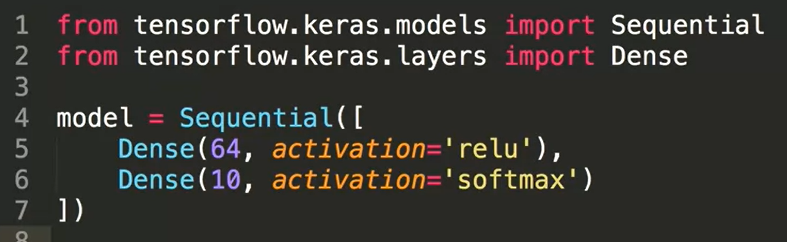

In [5]:
Image.open(r'C:\Users\44788/Desktop\it2.png')

to build a model we just create an instance of the sequential class
then simply pass in a list of keras layers
in this instance this is a feedforward model with a single hidden layer
without passing in acitvation - it will assume linear by default
however, so far we do not have enough information to create models weights and biases - we do not even know the input size
but this is okay until the training stage when you feed the data into the model 
alterantively you can explicitely tell the model what the input shape will be at the build stage
in this case the weights and biases will be created and initlaized straight away 

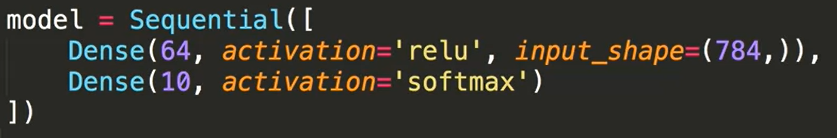

In [6]:
Image.open(r'C:\Users\44788/Desktop\it3.png')

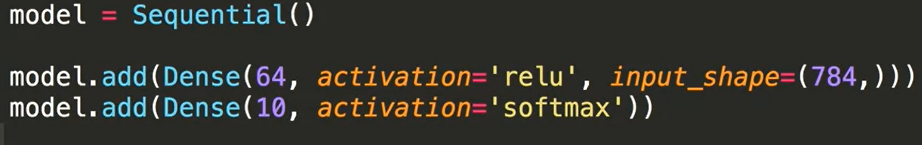

In [7]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

this is an alternaitive way to build the same model - where layers are added in 

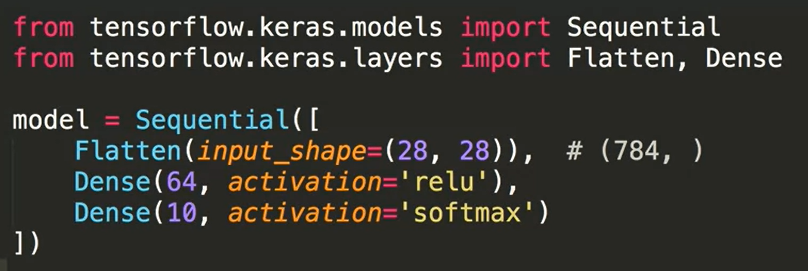

In [8]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

in this instance 2 layer types are imported
including the flatten which takes in an input shape and flattens it

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [10]:
model = Sequential([
    Flatten(input_shape=(28,28), name='input'), #this initilazes the weights as we have speicified the input
    Dense(16, activation='relu', name='Hlayer1'),
    Dense(16, activation='relu', name='Hlayer2'),
    Dense(10, activation='softmax', name='Olayer')
])

In [11]:
for weight in model.weights[::2]:
    print(weight.shape)

(784, 16)
(16, 16)
(16, 10)


In [30]:
model.summary() # this is better 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 784)               0         
_________________________________________________________________
Hlayer1 (Dense)              (None, 16)                12560     
_________________________________________________________________
Hlayer2 (Dense)              (None, 16)                272       
_________________________________________________________________
Olayer (Dense)               (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


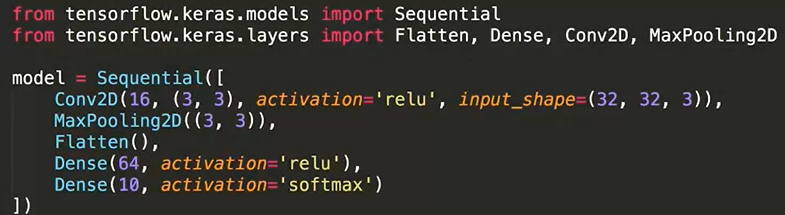

In [31]:
Image.open(r'C:\Users\44788/Desktop\it6.png')

this is conventional convolutionary network
input 32*32*3 colour channels
first layer is a convolutional layer - these have 2 required arguments, the first being the number of filters - second is the shape of the kernal/filter, passed through a relu
Maxpooling only required argument is the kernal size
followed by a flatten - doesnt require the vecotrr size to be specified 
then pass this into 3 dense layers

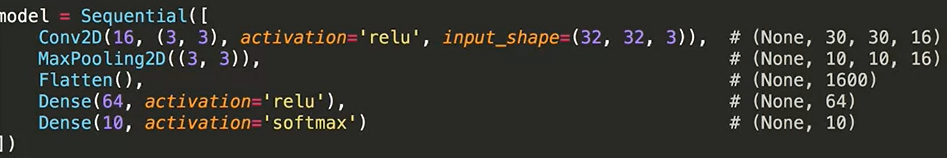

In [32]:
Image.open(r'C:\Users\44788/Desktop\it7.png')

as you can see the dimensions for [:1] are None - this is bevcause this is batch size and this has not been specified 
until inputs are passed in
padding can also be specified 

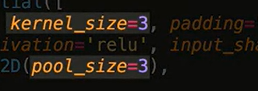

In [33]:
Image.open(r'C:\Users\44788/Desktop\it8.png')

this is a little shortcut

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [44]:
model = Sequential([
    Conv2D(16, kernel_size=3, padding='valid', strides=2, activation='relu',input_shape=(28,28,1), data_format='channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


The default values of the weights and biases in TensorFlow depend on the type of layers we are using.

For example, in a Dense layer, the biases are set to zero (zeros) by default, while the weights are set according to glorot_uniform, the Glorot uniform initialiser.

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval , where

c = np.sqrt(6/(n_input + n_output))

however in tensorflow we can easily chose how we want to initlize parameters

In [4]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

we can set out own intlizers using the parameters: kernal_initiaiser and bias initialiser

In [13]:
# however if we call upon the class directly we can allow use to choose some optional arguments
model.add(Dense(64,
               kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
               bias_initializer=tf.keras.initializers.Constant(value=0.4),
               activation='relu'))
model.add(Dense(8,
               kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None),
               bias_initializer=tf.keras.initializers.Constant(value=0.4),
               activation='relu'))

It is also possible to define your own initializers

In [5]:
import tensorflow.keras.backend as K

In [15]:
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

# Compile method

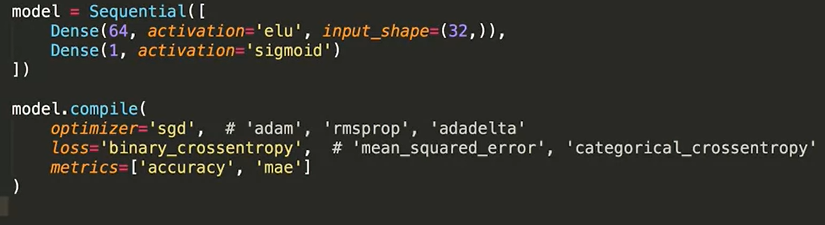

In [7]:
Image.open(r'C:\Users\44788/Desktop\it10.png')

64 unit dense layer with a exponential linear acitvation 
followed by a single sigmoid acitvation unit

the comile method method below specifies the optimizer as well as the loss function for the network 
sgd = stochastic gradient descent 
binary cross entropy makes sense as the loss function for a binary classificaiton task 

other options include:
adam, rmsprop, adadelta
mean_squared_error, catagorical_crossentropy

mae - mean absolute error

point is that there are a lot of human readible options to pass into the keras api

also possible to access all of these things by calling the keras modules directly 

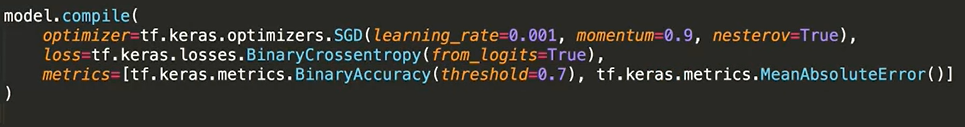

In [9]:
Image.open(r'C:\Users\44788/Desktop\it12.png')

as you can see this can be important as to access the the parameter functions of many of these obejects

when the activation is linear it outputs a logit:
Logit - any real value that is passed through before it is squeezed into an activation function
then as you can see with the Binary cross entropy, this means that the loss function should take in the linear output and fit it itself
this is a more numericaly stable approach 
binary classification gives us a threshold as to what should be classed as as a positive result

In [16]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005) # alternative ways to call below
acc = tf.keras.metrics.SparseCategoricalAccuracy() # allows for modification 
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'mae'])

In [17]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


# Metrics

consider binary classification - with softmax (ypred output float between 0 -- 1)
threshold determines whether its a 1 or 0

accuracy metric: computes the mean: of predicited true that were true and prediced true thast were false

In [21]:
y_true = tf.constant([0.0,1.0,1.0])
y_pred = tf.constant([0.4,0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

this same function works for catagorical classification - except now comparing to te giggest value in the y vector output - and checking index

In [23]:
y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0], [0.3,0.2,0.1,0.4], [0.05,0.35,0.5,0.1]])
accuracy = K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

In [24]:
# The threshold can be specified as follows

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

sparse catagorical accuracy - instead of one hot encoding it expects single digits

In [25]:
# Two examples of compiling a model with a sparse categorical accuracy metric

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

top k-catagorical:  instead of computing how often the model correctly predicts the label of a training example, 
the metric computes how often the model has  𝑦𝑡𝑟𝑢𝑒  in the top  𝑘  of its predictions. By default,  𝑘=5 .

As before, the main difference between top  𝑘 -categorical accuracy and its sparse version is that the 
former assumes  𝑦𝑡𝑟𝑢𝑒  is a one-hot encoded vector, whereas the sparse version assumes  𝑦𝑡𝑟𝑢𝑒  is an integer.

# Fit method

now the model is fully defined - now its time to train the model 

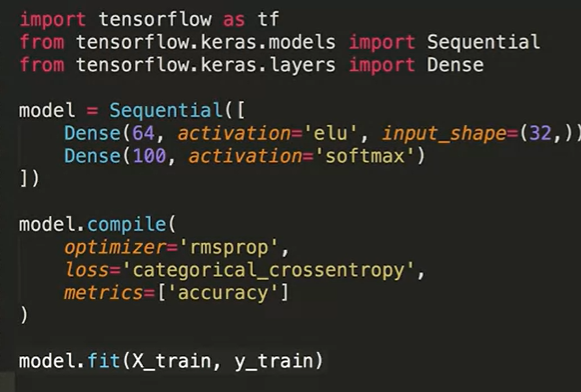

In [26]:
Image.open(r'C:\Users\44788/Desktop\it15.png')

all we have to do is call upon the fit method - and pass in thje X and Y data
as a numpy array

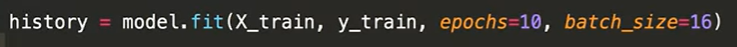

In [28]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

other options to alter how the model trains - such as batch size
this also feeds back an object - this is a history of all the losses etc.

In [6]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [81]:
train_images.shape, print(train_labels[1])

0


((60000, 28, 28), None)

rescale iages - so that input values lie between 0 and 1

In [82]:
train_images = train_images/255.
test_images = test_images/255

In [83]:
np.expand_dims(train_images, axis=3).shape

(60000, 28, 28, 1)

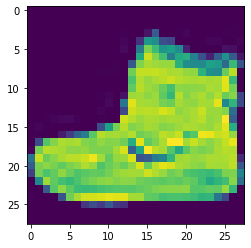

In [84]:
i = 0
img = train_images[i,:,:]
plt.imshow(img)

In [85]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(np.expand_dims(train_images, axis=3), train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 1s - loss: 0.5543 - sparse_categorical_accuracy: 0.8055
Epoch 2/8
235/235 - 1s - loss: 0.3661 - sparse_categorical_accuracy: 0.8707
Epoch 3/8
235/235 - 1s - loss: 0.3370 - sparse_categorical_accuracy: 0.8802
Epoch 4/8
235/235 - 1s - loss: 0.3197 - sparse_categorical_accuracy: 0.8859
Epoch 5/8
235/235 - 1s - loss: 0.3067 - sparse_categorical_accuracy: 0.8911
Epoch 6/8
235/235 - 1s - loss: 0.2981 - sparse_categorical_accuracy: 0.8931
Epoch 7/8
235/235 - 1s - loss: 0.2921 - sparse_categorical_accuracy: 0.8941
Epoch 8/8
235/235 - 1s - loss: 0.2834 - sparse_categorical_accuracy: 0.8979


In [86]:
df = pd.DataFrame(history.history)
df.head

<bound method NDFrame.head of        loss  sparse_categorical_accuracy
0  0.554258                     0.805483
1  0.366120                     0.870683
2  0.337012                     0.880217
3  0.319707                     0.885867
4  0.306684                     0.891117
5  0.298150                     0.893083
6  0.292130                     0.894050
7  0.283423                     0.897917>

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

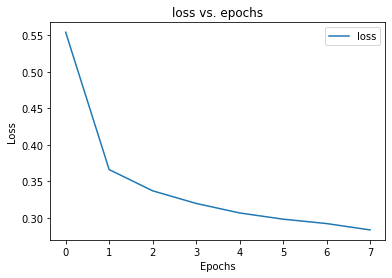

In [87]:
loss_plot = df.plot(y='loss', title='loss vs. epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

# Evaluate and Predict Methods

evaluate its performance 

In [88]:
model.evaluate(np.expand_dims(test_images, axis=3), test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8864


[0.3155200779438019, 0.8863999843597412]

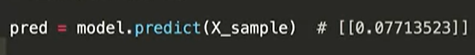

In [89]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

preciction returns an array of values - interpret as a probaility that the input put in belongs to a cetrtain class.
get a [number sameples, number classes] array

In [90]:
randomindex = np.random.choice(test_images.shape[0])
test_image = test_images[randomindex]
test_image = np.expand_dims(test_image, axis=0)
test_image = np.expand_dims(test_image, axis=3)

6


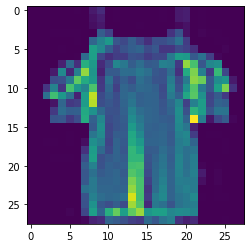

In [91]:
img = np.reshape(test_image, (28,28))
plt.imshow(img)
print(test_labels[randomindex])

In [92]:
predictions = model.predict(test_image)
print(np.argmax(predictions))

6


# Week 2 assignment

In [49]:
mnist_data = tf.keras.datasets.mnist
(train_images, test_labels), (test_images, test_labels) = mnist_data.load_data()

In [50]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    return train_images/255, test_images/255

In [51]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [52]:
# adding dummy channels
scaled_train_images = np.expand_dims(scaled_train_images, axis=3)
scaled_test_images = np.expand_dims(scaled_test_images, axis=3)

In [57]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = Sequential([
        Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model 

In [58]:
model = get_model(scaled_train_images[0].shape)

In [65]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
    )

In [66]:
compile_model(model)

In [67]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs=5)
    return history

In [68]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3039 - accuracy: 0.0985
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3025 - accuracy: 0.1005
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3013 - accuracy: 0.1061
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2970 - accuracy: 0.1195
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2846 - accuracy: 0.1336


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

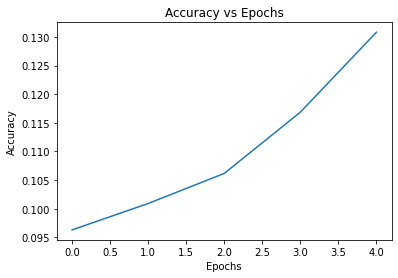

In [69]:
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

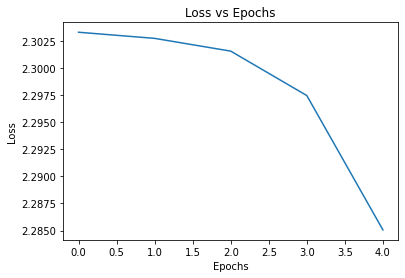

In [70]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

In [94]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_accuracy, test_loss = model.evaluate(scaled_test_images, test_labels)
    return test_accuracy, test_loss

In [95]:
test_accuracy, test_loss = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 8.1917 - sparse_categorical_accuracy: 0.1032
Test loss: 0.10320000350475311
Test accuracy: 8.191744804382324
